In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)                # Loading the data

In [121]:
x,y  = mnist['data'], mnist.target                # putting the data, target values in x and y variables rispectively
len(x)

70000

In [122]:
x[0].shape

(784,)

In [123]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

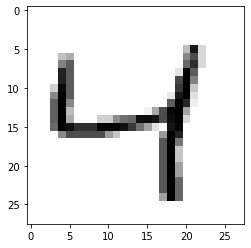

In [124]:
import matplotlib.pyplot as plt                     # trying to plot and look at the data
plt.imshow(x[2].reshape(-1,28), cmap='binary')
plt.show()

In [125]:
# splitting the data

x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [139]:
# shiffling the train Data

import numpy as np
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
shuffle_index

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [140]:
x_train = x[shuffle_index]
y_train = y[shuffle_index]

In [141]:
y_train_5 = (y_train == '5')
y_train_5

array([False, False, False, ..., False, False, False])

In [142]:
from sklearn.linear_model import SGDClassifier

In [143]:
clf = SGDClassifier(loss='hinge', penalty='l2')

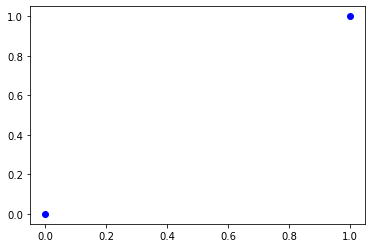

In [144]:
xs = np.array([0,1])
ys = np.array([0,1])
plt.plot(xs,ys,'bo')
plt.show()

In [145]:
import pandas as pd

In [146]:
X = {'xcord':pd.Series(xs),'y_cord':pd.Series(ys)}
# x = pd.Series(xs)
# y = pd.Series(ys)

In [147]:
df = pd.DataFrame(X, dtype=np.int16)
# df.columns = ['x','y']

In [148]:
df

,xcord,y_cord
0,0,0
1,1,1


In [149]:
y_target = [0,1]
clf.fit(df,y_target)

SGDClassifier()

In [150]:
clf.intercept_, clf.coef_

(array([-9.99002993]), array([[9.85221675, 9.85221675]]))

In [151]:
clf.coef_[0,0]

9.852216748768472

In [152]:
a = np.linspace(0,1,11)

In [153]:
y_pred = (-a*clf.coef_[0,0]-clf.intercept_)/clf.coef_[0,1]

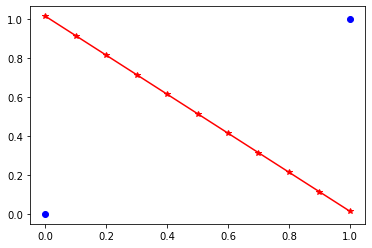

In [154]:
plt.plot(xs,ys,'bo')
plt.plot(a,y_pred,'r-',marker = '*')
plt.show()

In [155]:
clf.predict([[2.5,-3.5]])

array([0])

In [156]:
sgd_clf = SGDClassifier(random_state = 42, max_iter = 5)
sgd_clf.fit(x_train,y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

In [165]:
sgd_clf.predict([x_test[6000]])

array([False])

In [160]:
y_test[:10]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9'], dtype=object)